In [6]:
import cv2
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

SIZE_FACE = 48
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
np.random.seed(42)


In [7]:
# Read data
data = pd.read_hdf('./data/fer2013.h5','data')

# Images have to be reshaped for Keras (depth dimension = 1 for grayscale and 3 for RGB)
images = np.array(data["images"].tolist()).reshape(data["images"].values.shape[0], SIZE_FACE, SIZE_FACE,1)

# Labels have to be one hot encoded for Keras
labels = np_utils.to_categorical(data["emotion"].values, len(EMOTIONS))


X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.05, random_state=42)

In [ ]:
model = Sequential()
model.add(Convolution2D(64, (5, 5), activation='relu', input_shape=[SIZE_FACE, SIZE_FACE, 1]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(EMOTIONS), activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 18, 18, 128)       204928    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 5, 5, 256)         819456    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 2, 2, 256)         0         
__________

In [72]:
from keras.models import load_model

# model.save('./data/keras_model.h5')  # creates a HDF5 file 'keras_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('./data/keras_model_v1_64_95.h5')

score = model.evaluate(X_test, Y_test, verbose=1)

print("Accuracy on test dataset: ", score[1]*100)

699/699 [==============================] - 3s     
Accuracy on test dataset:  64.9499283754


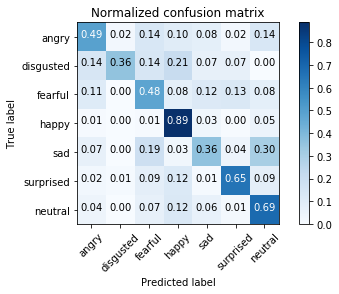

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = model.predict(X_test)


cnf_matrix = confusion_matrix(Y_test.argmax(1), y_pred.argmax(1))
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=EMOTIONS, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
model = Sequential()
model.add(Convolution2D(64, (5, 5), activation='relu', input_shape=[SIZE_FACE, SIZE_FACE, 1]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128, (4, 4), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(3072, activation='relu'))
model.add(Dense(len(EMOTIONS), activation='softmax'))
